# Run Scores 2
*pyscores2* is a python package that helps with running fortran program *Scores2*. 
The *pyscores2* helps out with the following:
1. Load an modify input files to *Scores2*
* Run *Scores2*
* Load and parse output files from *Scores2*

## 1. Load an modify input files to *Scores2*

In [1]:
from pyscores2.indata import Indata
import pyscores2.test
import pandas as pd
import matplotlib.pyplot as plt

c:\dev\pyscores2\venv\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #461
  styles = read_style_directory(stylelib_path)
c:\dev\pyscores2\venv\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #462
  styles = read_style_directory(stylelib_path)


An input file looks something like this:

In [2]:
indata_path = pyscores2.test.indata_path
with open(indata_path, mode='r') as file:
    print(file.read())

Ship indata
 1 0 0 0 1 0 0 0 0 120 2 0 0 0 0
326.600   1.025     9.80665   332793.0  
2.0000    0.1071    22.0000   
36.7000   0.8072    22.0000   
49.7400   0.8581    22.0000   
55.7400   0.9054    22.0000   
57.6800   0.9560    22.0000   
58.0000   0.9879    22.0000   
58.0000   0.9970    22.0000   
58.0000   0.9974    22.0000   
58.0000   0.9974    22.0000   
58.0000   0.9974    22.0000   
58.0000   0.9974    22.0000   
58.0000   0.9974    22.0000   
58.0000   0.9912    22.0000   
58.0000   0.9680    22.0000   
58.0000   0.9244    22.0000   
58.0000   0.8514    22.0000   
57.2800   0.7577    22.0000   
54.7800   0.6540    22.0000   
48.5800   0.5447    22.0000   
37.3600   0.3708    22.0000   
22.2000   0.6987    5.3900    
1.00      15.00     
78.38     154.13    
         0        10         1
1.0       50.00     700.00    50.00      5.000    10.000    5.000
0.0850    
180.0     360.0     30.0      
0
-1.0
/*
//



And it can be stored in an *Indata* object that looks like:

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

indata = Indata()
pp.pprint(indata.__dict__)


{ 'accelerationPoints': [],
  'bs': [],
  'cScores': [],
  'displacement': 0.0,
  'draught': 0.0,
  'g': 9.80665,
  'kxx': 0.0,
  'kyy': 0.0,
  'lcb': 0.0,
  'lines': '',
  'lpp': 0.0,
  'partOfCriticalRollDamping': 0.0,
  'projectName': 'New Project',
  'rho': 1025.0,
  'runOptionTags': [ 'IA',
                     'IB',
                     'IC',
                     'ID',
                     'IE',
                     'IF',
                     'IG',
                     'IH',
                     'II',
                     'IJ',
                     'N',
                     'IK',
                     'IL',
                     'IM',
                     'NMOT',
                     'NMOOR'],
  'runOptions': { 'IA': <pyscores2.indata.RunOption object at 0x0BD9D190>,
                  'IB': <pyscores2.indata.RunOption object at 0x0BD9D2B0>,
                  'IC': <pyscores2.indata.RunOption object at 0x0BD9D330>,
                  'ID': <pyscores2.indata.RunOption object at 0x0BD9

You can load indata file into the *Indata* object:

In [4]:
indata.open(indata_path)
pp.pprint(indata.__dict__)

{ 'accelerationPoints': [],
  'bs': [ 22.2,
          37.36,
          48.58,
          54.78,
          57.28,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          58.0,
          57.68,
          55.74,
          49.74,
          36.7,
          2.0],
  'cScores': [ 0.6987,
               0.3708,
               0.5447,
               0.654,
               0.7577,
               0.8514,
               0.9244,
               0.968,
               0.9912,
               0.9974,
               0.9974,
               0.9974,
               0.9974,
               0.9974,
               0.997,
               0.9879,
               0.956,
               0.9054,
               0.8581,
               0.8072,
               0.1071],
  'displacement': 332793.0,
  'draught': 0.0,
  'g': 9.80665,
  'indataPath': 'C:\\Dev\\pyscores2\\pyscores2\\test\\temp.in',
  'kxx': 15.0,
  'kyy':

## 2. Run *Scores2*
You can use this indata file to run *Scores2*

In [5]:
from pyscores2.runScores2 import Calculation
import os
outdata_directory='result'
if not os.path.exists(outdata_directory):
    os.mkdir(outdata_directory)

calculation = Calculation(outDataDirectory=outdata_directory)
calculation.run(indata_file_path=indata_path)

Running Scores2 for temp


## 3. Load and parse output files from *Scores2*
Now we can load the output from the calculation:

In [6]:
from pyscores2.output import OutputFile
output_file = OutputFile(filePath=calculation.outDataPath)
pp.pprint(output_file.results)

{ 10.0: { 0.0: <pyscores2.output.Result object at 0x0D17C910>,
          30.0: <pyscores2.output.Result object at 0x0D17C8D0>,
          60.0: <pyscores2.output.Result object at 0x0D17C870>,
          90.0: <pyscores2.output.Result object at 0x0D17C690>,
          120.0: <pyscores2.output.Result object at 0x0D17C950>,
          150.0: <pyscores2.output.Result object at 0x0D17C990>,
          180.0: <pyscores2.output.Result object at 0x0BD9D090>},
  19.0: { 0.0: <pyscores2.output.Result object at 0x0D17CFB0>,
          30.0: <pyscores2.output.Result object at 0x0D17CD90>,
          60.0: <pyscores2.output.Result object at 0x0D17CD10>,
          90.0: <pyscores2.output.Result object at 0x0D17CE30>,
          120.0: <pyscores2.output.Result object at 0x0D17CE90>,
          150.0: <pyscores2.output.Result object at 0x0D17CDF0>,
          180.0: <pyscores2.output.Result object at 0x0D17CA70>}}


C:\python35-32\lib\re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


We can load some of the results into a Pandas DataFrame:

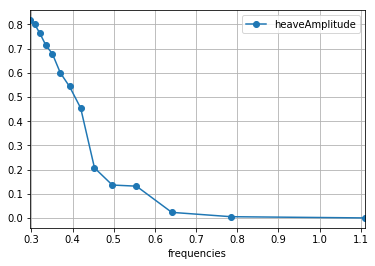

In [7]:
speed = 10.0
result_speed = output_file.results[speed]
result_180 = result_speed[180]
vertical_plane_responses= result_180.verticalPlaneResponses
df=pd.DataFrame(data=vertical_plane_responses.__dict__)
df.set_index('frequencies', inplace=True)
df.head()

fig,ax=plt.subplots()
df.plot(y='heaveAmplitude', style='o-', ax=ax)
ax.grid(True)